# Emotion Detection in Sinhala Language Texts in Social Media
## By 2021/E/045 and 2021/E053

In [1]:
#!pip install --upgrade -r requirements.txt

In [2]:
from transformers import pipeline

pipe = pipeline("fill-mask", model="NLPC-UOM/SinBERT-large")
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("NLPC-UOM/SinBERT-large")
model = AutoModelForMaskedLM.from_pretrained("NLPC-UOM/SinBERT-large")

F:\UOJE\Research\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cuda:0


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import cohen_kappa_score


In [4]:
dataset_path='./raw/Dataset.csv'
df = pd.read_csv(dataset_path, encoding='utf-8')
df = df.rename(columns={'Annotator 1': 'emotion_1', 'Annotator 2(Yasitha)': 'emotion_2', 'Phrase': 'text'})
df = df.loc[:, ~df.columns.str.contains(r'^Unnamed')]

In [5]:
df.head()

,emotion_1,emotion_2,text
0,joy,joy,නියම සිංහල මහත්මයෙක්.
1,joy,joy,අන්න මිනිස්සු...
2,disgust,anger,හොරා හොද මිනිහෙක් නම් අනේ මහත්තයෝ සමාවෙන්න කිය...
3,NaN,NaN,තව ඩිංගෙන් ලබු ගෙඩියත් කොස් ගෙඩි සහ පොල් ගෙඩි ...
4,disgust,disgust,"බතල වැලට, කොස්ගෙඩි අටට, උසාවි ගිහින් රිමන්ඩ් ක..."


## Data Preprocessing

### Changing the data type of the columns

In [6]:
# Use the renamed columns
df['emotion_2'] = df['emotion_2'].astype(str).str.strip()
df['emotion_1'] = df['emotion_1'].astype(str).str.strip()
df['emotion_2'] = df['emotion_2'].astype('category')
df['emotion_1'] = df['emotion_1'].astype('category')


# Verify the datatypes
print(df.dtypes)

emotion_1    category
emotion_2    category
text           object
dtype: object


In [7]:
df.head()

,emotion_1,emotion_2,text
0,joy,joy,නියම සිංහල මහත්මයෙක්.
1,joy,joy,අන්න මිනිස්සු...
2,disgust,anger,හොරා හොද මිනිහෙක් නම් අනේ මහත්තයෝ සමාවෙන්න කිය...
3,nan,nan,තව ඩිංගෙන් ලබු ගෙඩියත් කොස් ගෙඩි සහ පොල් ගෙඩි ...
4,disgust,disgust,"බතල වැලට, කොස්ගෙඩි අටට, උසාවි ගිහින් රිමන්ඩ් ක..."


### Cohen's Kappa Score

In [8]:
cohen_kappa_score(df['emotion_1'], df['emotion_2'])

0.793339071586885

In [9]:
string_cols = ['emotion_1', 'emotion_2']  # Add any other relevant string columns

for col in string_cols:
    df[col] = df[col].astype(str).str.replace(r'\s+', ' ', regex=True)  # normalize multiple spaces to one
    df[col] = df[col].str.strip()

In [10]:
df[''] = (
    df['emotion_1']
    .astype(str)
    .str.strip()              # remove leading/trailing spaces
    .str.replace(r'\s+', ' ', regex=True)  # collapse internal whitespace
    .str.lower()              # unify casing (optional)
)
df[''] = (
    df['emotion_2']
    .astype(str)
    .str.strip()              # remove leading/trailing spaces
    .str.replace(r'\s+', ' ', regex=True)  # collapse internal whitespace
    .str.lower()              # unify casing (optional)
)
# 3. Consolidate duplicate “disgust” entries
#    Any “disgust” (with or without stray spaces) now maps to canonical 'disgust'

In [11]:
counts1 = df['emotion_1'].value_counts()
small_labels = counts1[counts1 < 10].index.tolist()  # threshold = 10
df = df[~df['emotion_1'].isin(small_labels)]

counts2 = df['emotion_2'].value_counts()
small_labels2 = counts2[counts2 < 10].index.tolist()  # threshold = 10
df = df[~df['emotion_2'].isin(small_labels2)]

ano_1_count = df['emotion_1'].value_counts()
ano_2_count =df['emotion_2'].value_counts()
print(f" Annontator 1 -> {ano_1_count} \n\n Annontator 2 -> {ano_2_count}")

 Annontator 1 -> emotion_1
nan         7541
joy          804
disgust      642
sadness      554
surprise     537
anger        520
fear         509
Name: count, dtype: int64 

 Annontator 2 -> emotion_2
nan         6957
joy          941
disgust      747
sadness      694
anger        629
surprise     595
fear         544
Name: count, dtype: int64


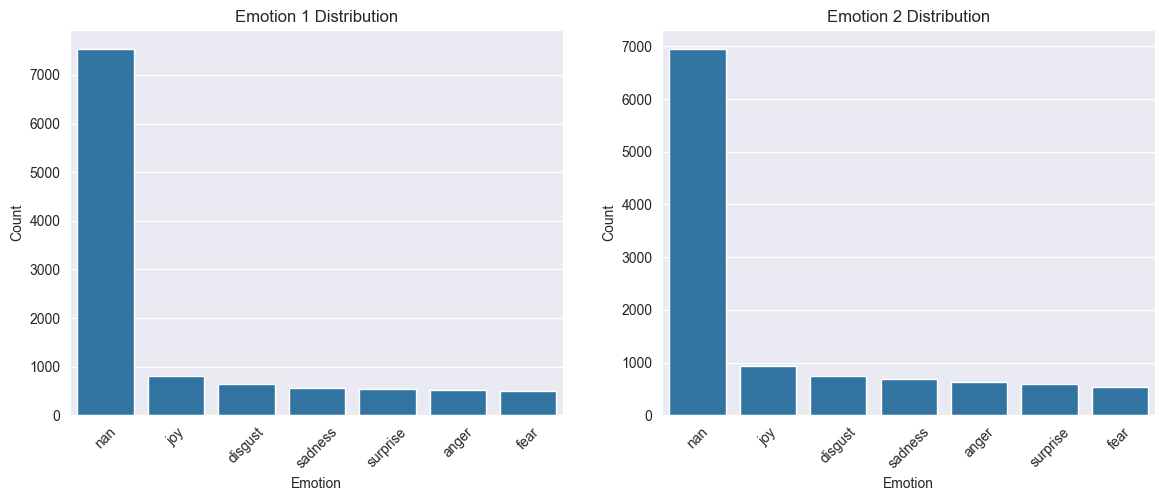

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.countplot(ax=axes[0], x='emotion_1', data=df, order=df['emotion_1'].value_counts().index)
axes[0].set_title('Emotion 1 Distribution')
axes[0].set_xlabel('Emotion')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(ax=axes[1], x='emotion_2', data=df, order=df['emotion_2'].value_counts().index)
axes[1].set_title('Emotion 2 Distribution')
axes[1].set_xlabel('Emotion')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)


plt.show()

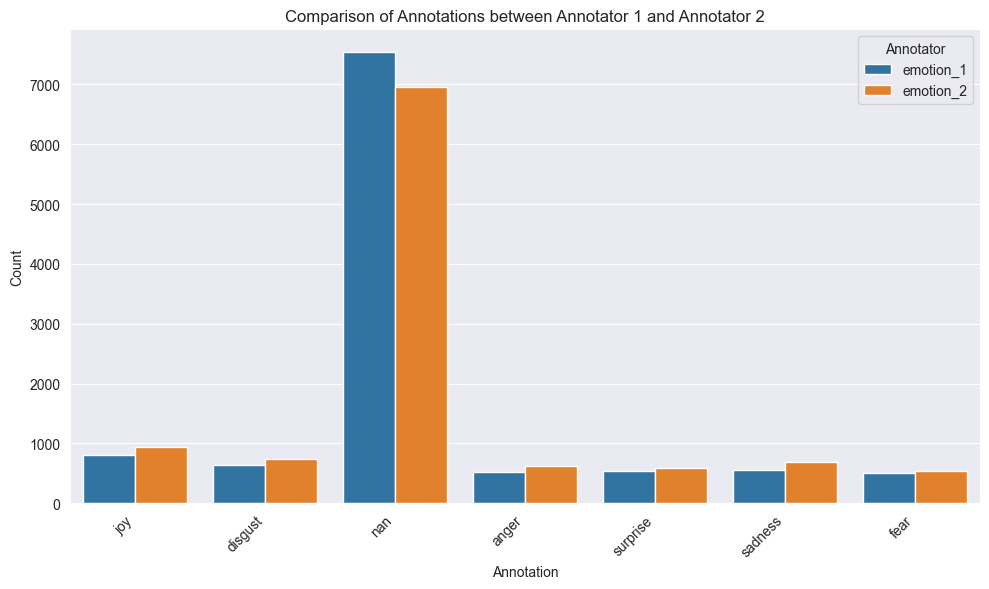

In [13]:
dataset_melted = df[['emotion_1', 'emotion_2']].melt(var_name='Annotator', value_name='Annotation')

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset_melted, x='Annotation', hue='Annotator')
plt.title('Comparison of Annotations between Annotator 1 and Annotator 2')
plt.xlabel('Annotation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

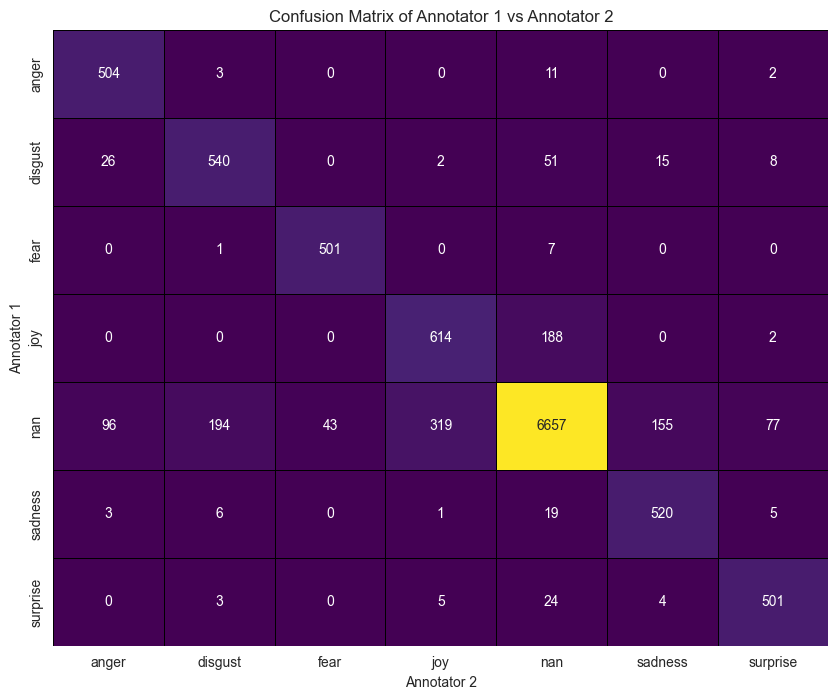

In [14]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(df['emotion_1'],df['emotion_2'])

labels = np.unique(df[['emotion_1', 'emotion_2']].values)
# Create a DataFrame from the confusion matrix for better visualization with seaborn
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='viridis',vmax=cm_df.values.max(), cbar=False, linewidths=0.5, linecolor='black')
plt.title('Confusion Matrix of Annotator 1 vs Annotator 2')
plt.xlabel('Annotator 2')
plt.ylabel('Annotator 1')
plt.show()

## Token Length Distribution

In [15]:
df = df.drop_duplicates()

# Optionally, reset the index after dropping duplicates
df = df.reset_index(drop=True)

In [16]:
# Remove columns with empty string as name or unnamed columns
df = df.loc[:, df.columns.str.strip() != '']

In [17]:
# Drop rows with any NaN in any column
df = df.dropna(how='any').reset_index(drop=True)
df.head()

,emotion_1,emotion_2,text
0,joy,joy,නියම සිංහල මහත්මයෙක්.
1,joy,joy,අන්න මිනිස්සු...
2,disgust,anger,හොරා හොද මිනිහෙක් නම් අනේ මහත්තයෝ සමාවෙන්න කිය...
3,nan,nan,තව ඩිංගෙන් ලබු ගෙඩියත් කොස් ගෙඩි සහ පොල් ගෙඩි ...
4,disgust,disgust,"බතල වැලට, කොස්ගෙඩි අටට, උසාවි ගිහින් රිමන්ඩ් ක..."


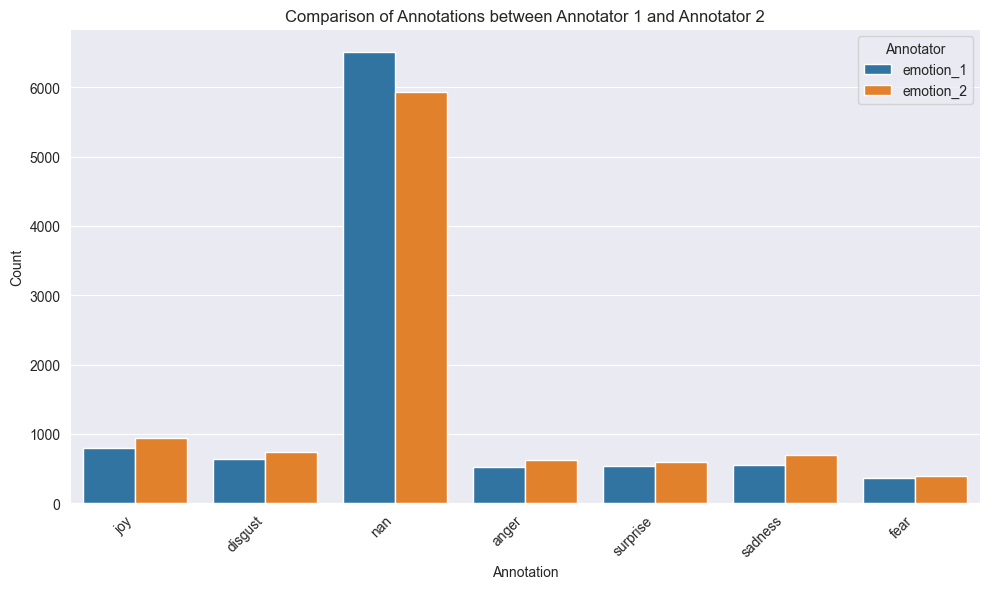

In [18]:
dataset_melted = df[['emotion_1', 'emotion_2']].melt(var_name='Annotator', value_name='Annotation')

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset_melted, x='Annotation', hue='Annotator')
plt.title('Comparison of Annotations between Annotator 1 and Annotator 2')
plt.xlabel('Annotation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [30]:

# Keep only rows where both annotators agree
df = df[df['emotion_1'] == df['emotion_2']].copy()

# Create a new 'label' column with the agreed emotion
df['label'] = df['emotion_1']

# Optionally, drop the original columns if not needed
df = df.drop(columns=['emotion_1', 'emotion_2'])

KeyError: 'emotion_1'

In [29]:
df.head()

,text,label
0,නියම සිංහල මහත්මයෙක්.,0
1,අන්න මිනිස්සු...,0
2,"බතල වැලට, කොස්ගෙඩි අටට, උසාවි ගිහින් රිමන්ඩ් ක...",1
3,"උපුල්, පහන්, ඔබලාට ස්තූතියි.",0
4,ඒ මනුෂ්‍යයා හොඳ කෙනෙක්.. හරිදේ ඒකයි... පින්වැඩ...,0


In [21]:

# Replace problematic values in 'label' and assign back to the column
df['label'] = df['label'].replace(['', 'nan', 'NaN'], np.nan)
df = df.dropna(subset=['label']).reset_index(drop=True)

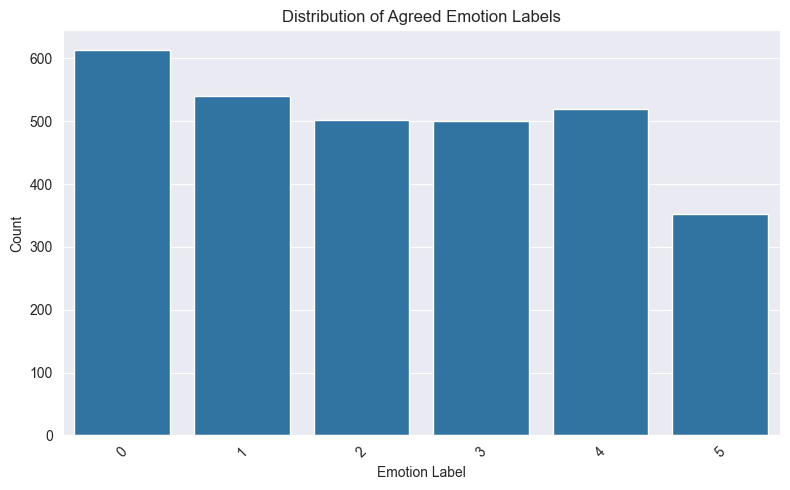

In [28]:

plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df)
plt.title('Distribution of Agreed Emotion Labels')
plt.xlabel('Emotion Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
# Check the number of samples for each class in the 'label' column
print(df['label'].value_counts())

label
joy         614
disgust     540
sadness     519
anger       502
surprise    500
fear        353
Name: count, dtype: int64


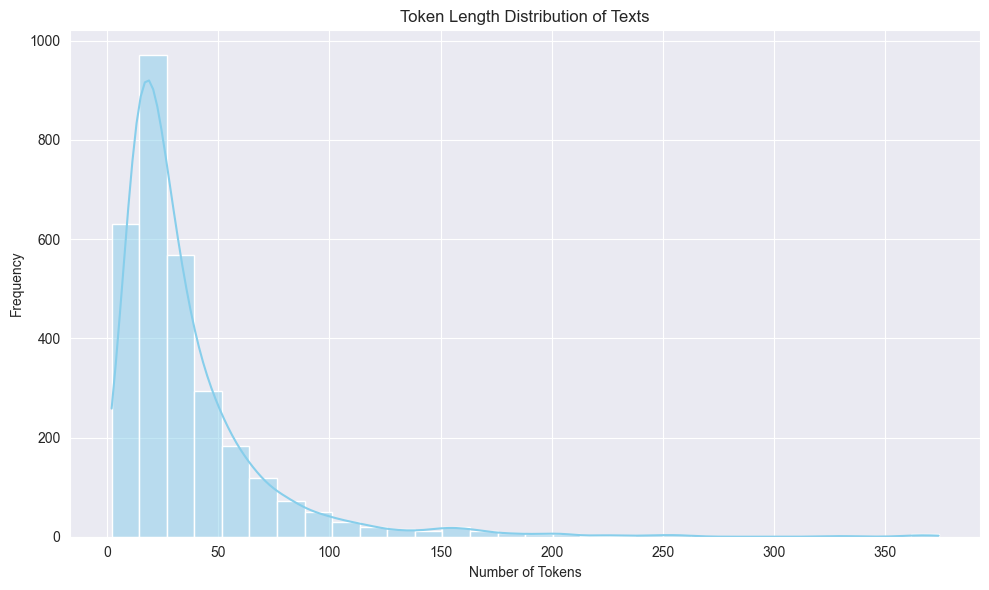

In [24]:
df['token_length'] = df['text'].apply(lambda x: len(tokenizer.tokenize(str(x))))

# 2. Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['token_length'], bins=30, kde=True, color='skyblue')
plt.title('Token Length Distribution of Texts')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
df.drop(columns=['token_length'], inplace=True)  # Clean up the DataFrame


In [25]:
# Map string labels to integers
label2id = {label: idx for idx, label in enumerate(df['label'].unique())}
df['label'] = df['label'].map(label2id)

class CustomTextDataset(df):
    def __init__(self, dataframe, tokenizer, max_length=200):
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        text = self.data.iloc[idx]['text']
        label = self.data.iloc[idx]['label']
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )
        item = {key: val.squeeze(0) for key, val in encoding.items()}
        item['label'] = torch.tensor(label, dtype=torch.long)
        return item

In [26]:
df.head()

,text,label
0,නියම සිංහල මහත්මයෙක්.,0
1,අන්න මිනිස්සු...,0
2,"බතල වැලට, කොස්ගෙඩි අටට, උසාවි ගිහින් රිමන්ඩ් ක...",1
3,"උපුල්, පහන්, ඔබලාට ස්තූතියි.",0
4,ඒ මනුෂ්‍යයා හොඳ කෙනෙක්.. හරිදේ ඒකයි... පින්වැඩ...,0


In [27]:
import os

# Ensure the processed folder exists
os.makedirs('./processed', exist_ok=True)
# Save the DataFrame
df.to_csv('./processed/processed_dataset.csv', index=False, encoding='utf-8')